In [1]:
import pandas as pd 
import numpy as np
import nltk                                # Python library for NLP  
import matplotlib.pyplot as plt            # library for visualization 
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
import collections
import seaborn as sns
from nltk.tokenize import word_tokenize

In C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [2]:
df=pd.read_csv(r'G:\Essentials\Hackathon PS\Predicting Sentiments\train.csv')

In [3]:
df.shape

(7920, 3)

In [4]:
df.head(20)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [5]:
df.drop('id',axis=1,inplace=True) # removing id column 

In [6]:
df.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [7]:
df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [8]:
corpus=[]

for i in range(0,7920):
     
    tweets = re.sub('[^a-zA-Z]', ' ',df['tweet'][i]) #  substituing all the none characters by space
    
    tweets=tweets.lower() # lowering 
    
    tweets=tweets.split()  
    
    ps = PorterStemmer()
    
    all_stopwords = stopwords.words('english')
    
    tweets = [ps.stem(word) for word in tweets if not word in set(all_stopwords)]
    
    tweets = ' '.join(tweets)
    
    corpus.append(tweets)

In [9]:
len(corpus)

7920

In [10]:
print(corpus)

['fingerprint pregnanc test http goo gl h mfqv android app beauti cute health iger iphoneonli iphonesia iphon', 'final transpar silicon case thank uncl yay soni xperia sonyexperia http instagram com p yget jc jm', 'love would go talk makememori unplug relax iphon smartphon wifi connect http fb n lsupcu', 'wire know georg made way iphon cute daventri home http instagr p li uj k', 'amaz servic appl even talk question unless pay stupid support', 'iphon softwar updat fuck phone big time stupid iphon', 'happi us instap instadaili us soni xperia xperiaz http instagram com p z qgfwlvj', 'new type c charger cabl uk http www ebay co uk itm bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex pic twitter com pjiwq wtc', 'bout go shop listen music iphon justm music likeforlik followforfollow http instagr p vj bg tlql', 'photo fun selfi pool water soni camera picoftheday sun instagood boy cute outdoor http tmblr co zajc n ms

In [11]:
for i in range(0,len(corpus)):
    print(i+2,corpus[i])

2 fingerprint pregnanc test http goo gl h mfqv android app beauti cute health iger iphoneonli iphonesia iphon
3 final transpar silicon case thank uncl yay soni xperia sonyexperia http instagram com p yget jc jm
4 love would go talk makememori unplug relax iphon smartphon wifi connect http fb n lsupcu
5 wire know georg made way iphon cute daventri home http instagr p li uj k
6 amaz servic appl even talk question unless pay stupid support
7 iphon softwar updat fuck phone big time stupid iphon
8 happi us instap instadaili us soni xperia xperiaz http instagram com p z qgfwlvj
9 new type c charger cabl uk http www ebay co uk itm bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex pic twitter com pjiwq wtc
10 bout go shop listen music iphon justm music likeforlik followforfollow http instagr p vj bg tlql
11 photo fun selfi pool water soni camera picoftheday sun instagood boy cute outdoor http tmblr co zajc n ms gp
12 

# Count Vectorizer

In [12]:
 from sklearn.feature_extraction.text import CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=None)

In [14]:
x=cv.fit_transform(corpus).toarray()

In [15]:
y=df['label']

Text(0, 0.5, 'Frequency')

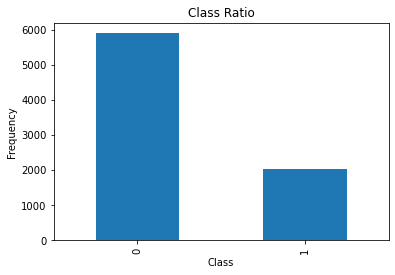

In [16]:
y.value_counts().plot(kind='bar')
plt.title('Class Ratio')
plt.xlabel('Class')
plt.ylabel('Frequency')

<p>Above chart depicts that there's class imbalance so, oversampling needs to be done

In [17]:
#oversampling
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x, y = sm.fit_resample(x, y.ravel())

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# NB 

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
model=MultinomialNB(alpha=1)
model.fit(x_train,y_train)
nbpred=model.predict(x_test)   

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,nbpred))

0.8927056827820187
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1193
           1       0.88      0.91      0.89      1165

    accuracy                           0.89      2358
   macro avg       0.89      0.89      0.89      2358
weighted avg       0.89      0.89      0.89      2358



In [26]:
confusion_matrix(y_test,nbpred)

array([[1043,  150],
       [ 103, 1062]], dtype=int64)

# LR

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model1=LogisticRegression(C=0.03)
model1.fit(x_train,y_train)

LogisticRegression(C=0.03)

In [27]:
ypred=model1.predict(x_test)

In [28]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1193
           1       0.87      0.96      0.91      1165

    accuracy                           0.91      2358
   macro avg       0.91      0.91      0.91      2358
weighted avg       0.91      0.91      0.91      2358



In [29]:
confusion_matrix(y_test,ypred)

array([[1020,  173],
       [  50, 1115]], dtype=int64)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
dtpred=model2.predict(x_test)

In [33]:
confusion_matrix(y_test,dtpred)

array([[1034,  159],
       [  96, 1069]], dtype=int64)

# Evaluation on test data

In [30]:
test=pd.read_csv(r'G:\Essentials\Hackathon PS\Predicting Sentiments\test.csv')

In [31]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [32]:
test.shape

(1953, 2)

In [33]:
corpus1=[]

for i in range(0,1953):
     
    tweets_test = re.sub('[^a-zA-Z]', ' ',test['tweet'][i]) #  substituing all the none characters by space
    
    tweets_test=tweets_test.lower() # lowering
    
    tweets_test=tweets_test.split()  
    
    all_stopwords = stopwords.words('english')
    
    tweets_test = [ps.stem(word) for word in tweets_test if not word in set(all_stopwords)]
    
    tweets_test = ' '.join(tweets_test)
    
    corpus1.append(tweets_test)

In [34]:
len(corpus1)

1953

In [35]:
for i in range(0,len(corpus1)):
    print(i+2,corpus1[i])

2 hate new iphon upgrad let download app ugh appl suck
3 current shit fuck pant appl imac cashmoney raddest swagswagswag http instagr p uui bibzo
4 like put cd rom ipad possibl ye block screen
5 ipod offici dead lost pictur video so concert vet camp hatinglif sob
6 fight itun night want music paid
7 repost getbakednfri repostapp announc appl bourbon http www instagram com p bk okhogwss
8 new appl softwar updat realli thing phone bad thing appl
9 babi iphon iphon gold new appl appleisbest gb geg nnt aaaaah http www instagram com p baux eqtkez
10 confus take time set appoint still wait minut fact
11 fruit tast better pick appl healthi fruit nyc http ift tt ri dyo pic twitter com zuo thmek
12 con mi buddi edgar buddi friend viviendo taller friendli hug soni smile sonrisa http instagram com p fasvzruzqi
13 mymomisgreatbecaus alway care anyth follow mothersday mustfollow mothersday iphon tweet
14 kiss romanc hot movi iphon sex porn lust matur woman get nail intens mission http bit ly spbtur

In [36]:
test_x=cv.transform(corpus1).toarray()

In [37]:
test_x.shape

(1953, 20200)

In [38]:
sub=pd.read_csv(r'G:\Essentials\Hackathon PS\Predicting Sentiments\sample.csv')

In [39]:
sub.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [40]:
new_pred=model_tf.predict(test_x)
sub['label']=new_pred
sub.to_csv(r"G:\Essentials\Hackathon PS\Predicting Sentiments\tfidf.csv",index=False)

In [41]:
lr_pred=model1.predict(test_x)
sub['label']=lr_pred
sub.to_csv(r"G:\Essentials\Hackathon PS\Predicting Sentiments\lr.csv",index=False)